In [169]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FormatStrFormatter
import seaborn as sns
import numpy as np
sns.set()
#sns.axes_style("darkgrid")
#sns.axes_style("ticks")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8,'axes.facecolor': '#EAEAF2'})
import os
import re
patternStrNumber = '[-+]? (?: (?: \d* \. \d+ ) | (?: \d+ \.? ) )(?: [Ee] [+-]? \d+ ) ?'
patternStrLetter = '([a-zA-Z]+)'
rn = re.compile(patternStrNumber,re.VERBOSE)
rw = re.compile(patternStrLetter,re.VERBOSE)

In [170]:
def makeColumnName(nameList):
    cln = []
    for i,name in enumerate(nameList):
        if name not in ['FWD','BKW','MHZ','csv'] and i%2==0:
            cln.append("{}({})".format(nameList[i+1],name))
    return cln

In [171]:
files = [f for f in os.listdir() if f.endswith(".csv")]
# print(files)
volts = rn.findall(files[0])
names = makeColumnName(rw.findall(files[0]))
df1 = pd.read_csv(files[0])
df2 = pd.DataFrame(np.repeat(volts[0:len(names)],len(df1),axis=0).reshape(len(names),len(df1)).T, columns=names)
df = pd.concat([df1,df2],axis=1)

for file in files[1:]:
    volts = rn.findall(file)
    names = makeColumnName(rw.findall(file))
    df1 = pd.read_csv(file)
    df2 = pd.DataFrame(np.repeat(volts[0:len(names)],len(df1),axis=0).reshape(len(names),len(df1)).T, columns=names)
    df = pd.concat([df,pd.concat([df1,df2],axis=1)])
df["VgDC(V)"] = df["VgDC(V)"].astype(float)
ampData = df.pivot(index='Freq', columns='VgDC(V)', values='Amp')
phsData = df.pivot(index='Freq', columns='VgDC(V)', values='Phs')

Text(0, 0.5, 'Freq (MHz)')

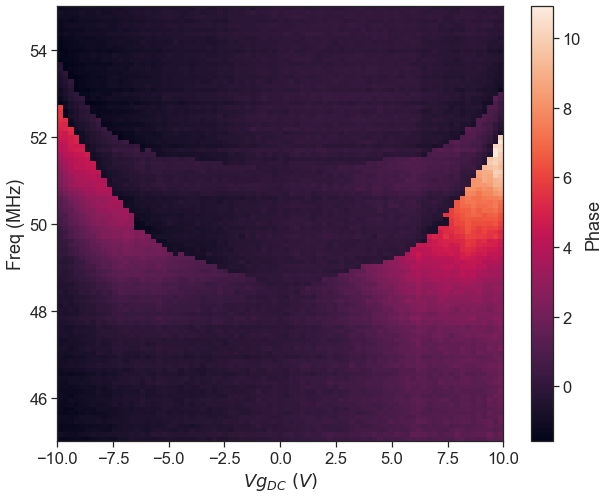

In [200]:
fig, ax = plt.subplots(figsize=(10, 8))
pos = ax.imshow(phsData.sub(phsData[0],axis='index'),
           origin='lower',
           extent=[min(ampData.columns),max(ampData.columns),
                   min(ampData.index),max(ampData.index)],
          interpolation='nearest',
          aspect='auto',)
          #cmap='Blues')
cbar = fig.colorbar(pos, ax=ax)
cbar.set_label('Phase',size=18)
ax.set_xlabel(r'$Vg_{DC} \ (V)$')
ax.set_ylabel("Freq (MHz)")

Text(0, 0.5, 'Freq (MHz)')

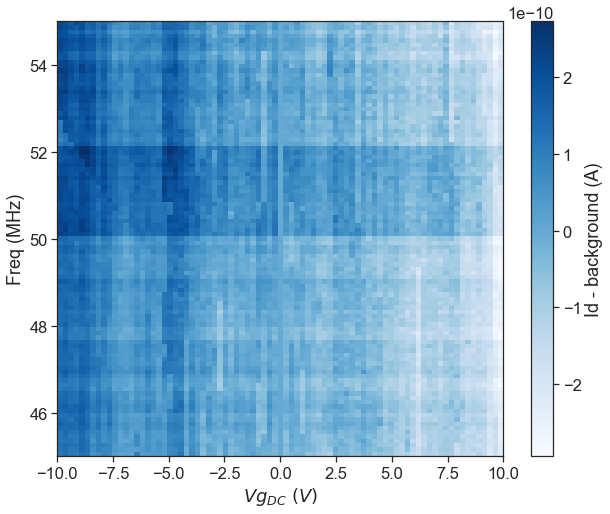

In [201]:
fig, ax = plt.subplots(figsize=(10, 8))
pos = ax.imshow(ampData.sub(ampData[0],axis='index'),
           origin='lower',
           extent=[min(ampData.columns),max(ampData.columns),
                   min(ampData.index),max(ampData.index)],
          interpolation='nearest',
          aspect='auto',
          cmap='Blues')
cbar = fig.colorbar(pos, ax=ax)
cbar.set_label('Id - background (A)',size=18)
ax.set_xlabel(r'$Vg_{DC} \ (V)$')
ax.set_ylabel("Freq (MHz)")

In [202]:
# ax = sns.heatmap(phsData)